# Data Science Pragmatic programming in Python


Code snippets for quick consult (copy n paste)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
!pwd

/media/leandroohf/sdb1/leandro/ds_pragmatic_programming


## Bash

### Random sample

In [ ]:
%%bash 
# take random sample of lines in file (log analysys was useful)

shuf data/FremontBridge.csv | head -n 3 


### Filter with grep

In [ ]:
%%bash 

# Use grep to filter out pattern
cat data/FremontBridge.csv | grep -v 2013 | head -n 5

echo
# keep only 2013 and ignore case sensitive
cat data/FremontBridge.csv | grep -i 2013 | head -n 5

# Using regular expression (start with 12)
echo
cat data/FremontBridge.csv | grep -E "^12" | head -n 5

### run process in parralell

In [ ]:
# Use pararlels to speedup bash

## Notebooks tricks 


* *Run notebook in remote jupyter server*

In [ ]:
%bash

# run in thew remote machine
jupyter notebook --no-browser --port 8889

# run local machine
ssh -N -f -L localhost:8888:localhost:8889 datalab@172.21.1.4

# Copy token from the remote machine shell
# access jupyter notebook
http://localhost:8888/?token=054a85cc962d8c7ee5ba99517bfc5303020c7e2736f4b268


This can help with interacting with shell
* share variables between python and bash cell

In [ ]:
python_var = 'test1'
var_test2 = 10.3

# Option 1
data =  './mydata'

!mkdir -p {data}

In [ ]:
%%bash -s "$python_var" "$var_test2" "position_3"

echo $1
echo $2
echo $3
echo $data ## will not work

* define enviroment variable shared between bash cells

In [ ]:
%env MY_VAR=env_test_var
%env  v1=$python_var

In [ ]:
%%bash 

echo $MY_VAR
echo $v1

* **Run R code in cell**

In [3]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

/home/leandroohf/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/home/leandroohf/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  unable to access index for repository http://cran.us.r-project.org/src/contrib:
  Line starting '<!DOCTYPE HTML PUBLI ...' is malformed!

  warnings.warn(x, RRuntimeWarning)


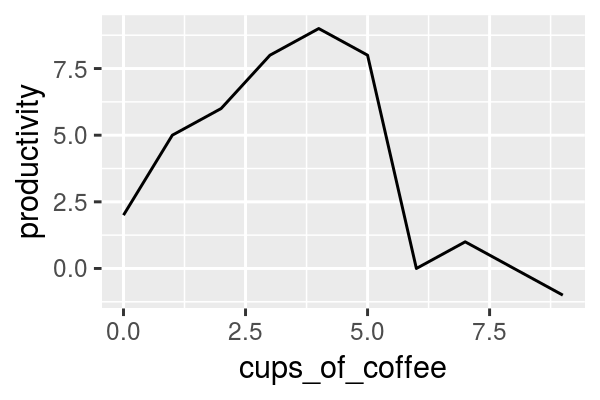

In [4]:
%%R -i df -w 3 -h 2 --units in -r 200
# import df from global environment
# make default figure size 3 by 3 inches with 200 dpi resolution

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

## Generate data 

* random numbers generation
* generate data
* load data sets (toy)

http://scikit-learn.org/stable/datasets/index.html

### Gen random numbers

* uniform
* normal
* multivariate
* bolean
* integer

In [ ]:
## random numbers
np.random.seed(seed=2018)

n = 3
a = np.random.rand(n,n)

# random boolean
b = np.random.uniform(size=3) > .5
b

# uniform
u = np.random.uniform(size=3)
u

# random int
i = np.random.randint(0,9,size=3)
i

# random choice
c = np.random.choice(['a','b','c','e'],size=7)
c

# normal
n = np.random.normal(size=5)
n

# multivariated normal 2d;
_mean = (1, 2)
_cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(_mean, _cov, 3 )
m.shape
m

### Create dataframes

In [ ]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

pd.DataFrame.from_dict(data)


data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')



# HOW to fixe: If using all scalar values, you must pass an index
# pd.DataFrame.from_dict({'col1': 1, 'col2': 3}) # <= RUN THIS LINE TO SEE THE ERROR
#pd.DataFrame({'A': 1, 'B': 2}) # # <= RUN THIS LINE TO SEE THE ERROR
pd.DataFrame({'A': 1, 'B': 2}, index=[0])

# OR
pd.DataFrame({'A': [1], 'B': [2]})

### Gen data for classifications and clustering

Shameless stolen from:
http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py


* **make_classification** create multiclass datasets by allocating each class one or more **normally-distributed** clusters of points

   make_classification introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

In [ ]:
## classification (normal distributed)
from sklearn.datasets import make_classification

plt.figure(figsize=(10, 15));

plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95);

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.subplot(321);
plt.title("One informative feature, one cluster per class", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)

plt.subplot(322);
plt.title("Two informative features, one cluster per class", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');


X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)

plt.subplot(323);
plt.title("Two informative features, two clusters per class",
          fontsize='small');

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

plt.subplot(324);
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

plt.show();

* **make_blobs**: Generate isotropic (uniformity in all orientations) Gaussian blobs for clustering. 

* **make_gaussian_quantiles**: Generate isotropic Gaussian and label samples by quantile

In [ ]:
## Blobs n gaussian qunatiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_blobs(n_features=2, centers=3, random_state=2018)

plt.figure(figsize=(11,5));

ax1 = plt.subplot(121);
plt.title("Three blobs", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3,n_samples=256,random_state=2018)

ax2 = plt.subplot(122);
plt.title("Gaussian divided into three quantiles", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

ax2.set_xlim(-4,4);
ax2.set_ylim(-4,4);

plt.show()

* **make_circles**: Make a large circle containing a smaller circle in 2d.

* **make_moons**: Make two interleaving half circles

In [ ]:
## Clustering
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2018)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8));

ax1 = plt.subplot(121,aspect='equal');
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax1.set_title("Circle Data (2d)");
ax1.set_xticks(());
ax1.set_yticks(());


X, y = make_moons(n_samples=400, noise=.05,random_state=2018)

ax2 = plt.subplot(122,aspect='equal');
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax2.set_title("Moons Data (2d)");
ax2.set_xticks(());
ax2.set_yticks(());

plt.tight_layout();
plt.show;


### Load data sets


* **load_iris** Load and return the iris dataset (classification).

<img src="images/iris_petal_sepal.png" width="250" align="left"/>


In [ ]:
## datasets

from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print('data size: {}'.format(X_iris.shape))
print('features: {}'.format(iris.feature_names))
print('labels: {}'.format(iris.target_names))

print()

plt.figure(2, figsize=(4, 3));
plt.clf();

# Plot 
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, cmap=plt.cm.Set1,
            edgecolor='k');
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

* **load_boston**: Load and return the boston house-prices dataset (regression).

In [ ]:
# Boston house pricing

from sklearn.datasets import load_boston

boston = load_boston()

print('data size: {}'.format(boston.data.shape))
print('features: {}'.format(boston.feature_names))

# convert to data frame (but may times is not necessary)
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df['target'] = boston.target

boston_df.head(4)

In [ ]:
data = pd.read_csv('data/phone_data.csv')

data.shape
data.head(5)

## Read and write data

* pandas
* dict
* file handle


### Pandas

* read from compressed csv
* read from sql db

In [ ]:
#See the first rows
pd.read_csv('data/phone_data.csv', nrows=2).head()

## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)


creditcard_df.head(3)

In [ ]:
# reads form database
import pandas as pd
import sqlite3

#conn = sqlite3.connect("data/flights.db")
with sqlite3.connect("data/flights.db") as conn:
    df = pd.read_sql_query("select * from airlines limit 11;", conn)
    
df.head(3)

In [ ]:
df = pd.read_csv('data/phone_data.csv')
df.head(3)

### Basic and dict IO

In [ ]:
!rm -v data/output.tsv

* **Write txt file line by line**

In [ ]:
# lazzy way
for k in range(0,3):
    
    if k % 2 == 0:
        print('Processing: {}'.format(k))

    score =  np.random.normal(size=1)[0]
    print("{k:d}\t{score:.2f}".format(k=k, score=score), file=open("data/output.tsv", "a"))

# better way
with open('data/output.txt', 'a') as f:
    for k in range(0,3):
    
        if k % 2 == 0:
            print('Processing: {}'.format(k))

        score =  np.random.normal(size=1)[0]
        print("{k:d}\t{score:.2f}".format(k=k, score=score), file=f)


In [ ]:
!cat data/output.tsv

In [ ]:
import csv

my_dict = {'key1': 'value_a', 'key2': 1, 'key3': 2.0}

# write
with open('data/dict.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in my_dict.items()];


# read
with open('data/dict.csv', 'r') as csv_file:
    
    reader = csv.reader(csv_file)
    my_dict2 = dict(reader)
    
my_dict2

In [ ]:
!cat data/dict.csv

In [ ]:
dict_list = [ {'key1': 1, 'key2': 'a'}, {'key1': 2, 'key2': 'b'}]

fieldnames = dict_list[0].keys()

# write
with open('data/people.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    dict_writer.writeheader()
    dict_writer.writerows(dict_list)
    
# read
with open('data/people.csv', mode='r') as infile:
    
    reader = csv.reader(infile)
    _ = next(reader, None)  # skip the headers
    mydict = [{'key1': rows[0], 'key2': rows[1]} for rows in reader]
    
mydict

In [ ]:
!cat data/people.csv

## Get data from internet 

In [ ]:
!curl -o data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
bikes.head()

## Data wrangler (Remember, 80% of the project time is spent here)


[pandas cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

refs:
https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c  

https://github.com/tdpetrou/Learn-Pandas

<img src="images/data_frame.png" width="800" align="left"/>

### Slicing or selection

pandas terminology are the indexers that do selections or subsetting: "[]", .loc and .iloc

In [ ]:
data = {
'state': ['NY','TX','FL','AL','AK','TX','TX' ],
'color': ['blue','green','red','white','gray','black','red'],
'food': [ 'Steak', 'Lamb', 'Mango', 'Apple', 'Cheese', 'Melon', 'Beans' ],
'age': [ 30, 2, 12, 4, 32, 33, 69 ],
'height': [ 165, 70, 120, 80, 180, 172, 150 ],
'score': [ 4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2 ]
}

df = pd.DataFrame.from_dict(data, )
df.index = ['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia' ]

values = df.values
df

df.columns
values

* *indexing operator: []**

In [ ]:
# returns a series
# A Series is a one-dimensional sequence of labeled data. 
df['food']
    
# Select multiple columns as a DataFrame by passing a list to it
# return dataframe
# the order of the column does not matter for selecting
df[['color', 'food', 'score']]

* **.loc** subset rows and columns

only selects data by the LABEL of the rows and columns.


In [ ]:
# Select rows  n returns serries
df.loc['Niko']

# select mutliple rows n return data frames
df.loc[['Niko', 'Penelope']]


# Slicing between range of rows
df.loc['Niko':'Dean']

# from begin to Aaron
df.loc[:'Aaron']

# from Dean to end
df.loc['Dean':]

# controling the step
df.loc['Niko':'Christina':2]


# selecting rows n columns
# df.loc[row_selection, column_selection]
df.loc[['Dean', 'Cornelia'], ['age', 'state', 'score']]


* **.iloc**

only uses integer locations to make its selections.

In [ ]:
df.iloc[[5, 2, 4]]  

df.iloc[3:5]

# Select 3rd position to end by 2:
df.iloc[3::2]

# Select two rows and two columns:
df.iloc[[2,3], [0, 4]]

# slices for both axes
df.iloc[2:5, 2:5]

df.iloc[:,2:5]

* Selecting hierarchical columns like the ones returned by grouby

**TODO**: How to select multiple rows? 

In [ ]:
# Example
df[('loading_time','median')]

### Delete colum or row,  reset index,  convert to a type, concat dataframes and sort




| Pandas dtype  | Python type | NumPy type                                                     | Usage        |
|-------------- | ----------- | -------------------------------------------------------------- | -------------|
| object        | str         | string_, unicode_                                              | Text         |
| int64         | int         | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Int,numbers  |
| float64       | float       | float_, float16, float32, float64                              | Floa, numbers|
| bool          | bool        | bool_                                                          | True/False   |
| datetime64    | NA          | datetime64[ns]                                                 | Date n time  |
| timedelta[ns] | NA          | NA                                                             | Dif btw times|
| category      | NA          | NA                                                             | factors      |


In [ ]:
# drop columns
df = df.drop(columns=['B', 'C'])

#drop rows by index
df = df.drop([0, 1])

# reset index
df = df.reset_index()

# see the types
df.dtypes

# see more info <= BETTER THAN dtypes for inspection
df.info()

# convert to a type
df['Customer Number'] = df['Customer Number'].astype('int')


In [ ]:
pages_view = pd.concat(pages, ignore_index= True)

In [ ]:
df.sort_values(['a', 'b'], ascending=[True, False])

### Work with category (factors) data

https://pbpython.com/categorical-encoding.html

* How to convert to category
* Label encoding
* One hot encode
*


Only if I see values
See this article http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/
and the package is here http://contrib.scikit-learn.org/categorical-encoding/
    
    

### Missings

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

bikes.columns = ['West', 'East']

bikes.shape

bikes = bikes.dropna()
bikes.shape

bikes.head()

### duplicates

In [ ]:
data = {'col_1': [3, 2, 3, 0], 'col_2': ['a', 'b', 'a', 'd']}

df = pd.DataFrame.from_dict(data)
df.head()

# last or first <= default or False = drop all cases
# subset to ignore olther columns while considering duplicated
df = df.drop_duplicates(keep='last',subset=['col_1','col_2'])

df.head()

### Path manipulations

http://pbpython.com/pathlib-intro.html


<img src="images/pathlib_cheatsheet_p1.png" width="600" align="left"/>

In [ ]:
from pathlib import Path

in_file_1 = Path.cwd() / "in" / "input.xlsx"

p = Path.cwd()


print('logical checks: is a dir , is a file?')
p.is_dir()

p.is_file()


print('Get parts (split)')
p.parts


print('paths, parents ...')
p.absolute()

p.parent

p.as_uri()


### String manipulation 


* basic string manipulation
* vectorized string manipulation
  (take notes of the pros n crons)
    
    https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html
        

## Data summarizations and merge data

### Summarize data


* descriptive (tables)
* groupby
* count frequency 


In [ ]:
data = pd.read_csv('./data/phone_data.csv')

data.shape

data.head(5)

#### Count frequency

In [ ]:
data.item.unique()
print()
data.item.value_counts()

#### Groupby



Split-Apply-Combine

<img src="images/split-apply-combine.png" width="400" align="left"/>


In [ ]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(['month', 'item'], as_index=False).aggregate({
                                 'duration': {'min': min, '1q': lambda x: np.percentile(x,25),'median': np.median,
                                                          '3q': lambda x: np.percentile(x,75), 'max': max,
                                                          'std': np.std, 'cv': lambda x: np.median(x)/np.std(x)},
                                 'date':  'first',       # get the first date per group
                                 'network_type': ['nunique', 'count']
                                    }).sort_values(by=[('duration','min')],ascending=False, na_position='last').head(7)


#### crosstab

In [ ]:
pd.crosstab(data.network_type, data.item, margins=True, margins_name="Total")

pd.crosstab(data.network_type, data.item, normalize=True)

**comparing with groub by and pivot table**

crosstabe is more easy to read and do not have the extr steps

In [ ]:
pd.crosstab(data.network_type, data.item)

data.groupby(['network_type', 'item'])['network_type'].count().unstack().fillna(0)

data.pivot_table(index='item', columns='network_type', aggfunc={'network_type':len}, fill_value=0)


#### pivot table

http://pbpython.com/pandas-pivot-table-explained.html



<img src="images/pivot-table-datasheet.png" width="500" align="left"/>

In [ ]:
table = pd.pivot_table(data,index=["item","network_type"],
               values=["duration"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

table

In [ ]:
table.query('network_type == ["data", "sms", "mobile"]')

### Joins


left , right n inner join

| Merge method | SQL Join Name    | Description                               |  
|--------------|----------------- |-------------------------------------------|  
| left         | LEFT OUTER JOIN  | Use keys from left frame only             |  
| right        | RIGHT OUTER JOIN | Use keys from right frame only            |  
| outer        | FULL OUTER JOIN  | Use union of keys from both frames        |  
| inner        | INNER JOIN       | Use intersection of keys from both frames |



In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'], 
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],  
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, how='left', on=['key1', 'key2'])

left

right

result

### Cartesian product or cross join

In [ ]:
df1 = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3']})


df2 = pd.DataFrame({'key1': ['Q0', 'Q1', 'Q2', 'Q3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


# Add dummy key
df1['_tmpkey'] = 1
df2['_tmpkey'] = 1

cartesian_df = pd.merge(df1[['_tmpkey',"A"]], df2[['_tmpkey',"B"]], on='_tmpkey').drop('_tmpkey', axis=1)
#cartesian_df.index = pd.MultiIndex.from_product((df1.index, df2.index))
cartesian_df = cartesian_df.reset_index(drop=True)

df1.drop('_tmpkey', axis=1, inplace=True)
df2.drop('_tmpkey', axis=1, inplace=True)


cartesian_df.head(11)

### High performance eval n query

https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html

Motivations
for large df n arrays eval n query are faster


## Time Series

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html


### Data wrangler

#### Date manipulation

In [ ]:
from datetime import datetime
from dateutil import parser

date = datetime(year=2015, month=7, day=4)
date

date = parser.parse("4th of July, 2015")
date

date = pd.to_datetime("4th of July, 2015")
date


date = np.array('2015-07-04', dtype=np.datetime64)
date

date + np.arange(3)


**Pandas freq meanings**

* D	Calendar day	
* W	Weekly		
* M	Month end	
* Q	Quarter end	
* A	Year end	
* H	Hours	
* T	Minutes		
* S	Seconds		
* L	Milliseonds		
* U	Microseconds		
* N	nanoseconds
* B	Business day
* BM	Business month end
* BQ	Business quarter end
* BA	Business year end
* BH	Business hours

In [ ]:
pd.date_range('2015-07-03', periods=3, freq='D')

pd.period_range('2015-11', periods=3, freq='M')

pd.timedelta_range(0, periods=3, freq='H')

#### Indexing dataframe by date

It is useful because you can pass any valu that can be coerced into dates:

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

In [ ]:
print('Filter by selected days')
data['2014-07-04':'2015-07-04']
print()

print('get all rows in a year')
data['2015']

In [ ]:
import quandl
import datetime

# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2004,1,1)
end = datetime.date.today()

s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
type(apple)

apple.head(3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

apple.plot(y='Open');

### resampling

see pandas frequency legends  
BA =>  Business year end


In [ ]:
apple = apple.Close

apple.plot(alpha=0.5, style='-')
apple.resample('BA').mean().plot(style=':')
apple.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

**Summarize data: daily, weekly n monthly **


In [ ]:
daily = apple.resample('D').sum()
weekly = apple.resample('W').sum()
monthly = apple.resample('M').sum()
quartely = apple.resample('Q').sum()

type(weekly)
weekly.head(5)

print()
monthly.head(3)

print()
quartely.head(3)

In [ ]:
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

#### Rolling windows (TODO)
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [ ]:
rolling = apple.rolling(182, center=True)

data = pd.DataFrame({'input': apple,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

**Get smoother version of a rolling mean using a window function–for example, a Gaussian window.**

In [ ]:

daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');


# smotth version
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


### lag (shift) operations

shift is specified in multiples of the frequency. So we need to set it first


In [ ]:
# apply a frequency to the data
apple = apple.asfreq('D', method='pad')

ROI = 100 * (apple.tshift(-365) / apple - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Aggregation n group by


data is bike sharing in seattle


we  can use aggregation to see sazonality in the data

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

bikes.columns = ['West', 'East']
bikes['Total'] = bikes.eval('West + East')

bikes.head()

In [ ]:
bikes.dropna().describe()

In [ ]:
by_time = bikes.groupby(bikes.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. 

In [ ]:
by_weekday = bikes.groupby(bikes.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.


With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.


In [ ]:
weekend = np.where(bikes.index.weekday < 5, 'Weekday', 'Weekend')
by_time = bikes.groupby([weekend, bikes.index.time]).mean()


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5));
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-']);
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

## NLP


TODO: 

ADD explanations of the terms in NLP

1. corpora
2. semantics
3. stop words
4. n-gram
5. skip_grma


TODO: ADD Code to do 
    
1. bag of words
2. use wrodvec
3. glove


## Graph Data

TODO:

1. Create graphs from tables
2. Get connected components
3. Graph visualizations


## Geo located data


TODO:

1. Read images
2. combine raster n data images with vectorial images
3. do kring interpolation in a sparse data


## Neural network



## Visualizations



Plotly does not work vercy well with large data (too slow), at least with jupyter  notebook
https://plot.ly/python/ipython-notebook-tutorial/

about license offiline plotly
https://stackoverflow.com/questions/35511111/plotly-python-totally-free

1. free
2. open source

All the libraries API; Matlab, Python n R alwasy were free. pltly.js only form 2015

The Accounts you can create on their website are just to host graphs online. Like with a free account you can host one private graph, with a professional account you can host unlimited private/public graphs


### Interactive plots  (good to examine the data)

    1. Scatter plot
    2. Boxplot per category n try the width is sample size
    3. Histograms subplot
    4. financial data https://help.plot.ly/make-a-candlestick/ candles and select periodo tool
    5. maps (geo located plots)
    6. tables with filters 
    7. mini plot inside a plot https://help.plot.ly/getting-data/
    8. network graphs: https://plot.ly/python/network-graphs/


### Analysis plots

    1. correlation matrix with scatter plot
    2. pair plot

### Load data

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

iris_df['target'] = iris.target

iris_df['target_name'] = iris_df.target.map(lambda t: iris.target_names[int(t)])

iris_df.columns
iris_df.head(3)

### Corr plots, pair plots and heat map plots

In [ ]:
import seaborn as sns

sns.pairplot(iris_df.loc[:,iris_df.dtypes == 'float64'])

In [ ]:
corr = iris_df.loc[:,iris_df.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

### Boxplot

**plotly does not support boxplot width proportional to variable or sample size**

In [ ]:
## offline plot
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = []

for tn in iris_df.target_name.unique():
    
    df = iris_df[iris_df.target_name == tn]
    print('size of group {}: {}'.format(tn, df.shape[0]))
    
    data.append(  go.Box( y=df['sepal length (cm)'] , name=str(tn), showlegend=False ) )

plotly.offline.iplot(data)

In [ ]:
data = []

for tn in iris_df.target_name.unique():
    
    df = iris_df[iris_df.target_name == tn]
    print('size of group {}: {}'.format(tn, df.shape[0]))
    
    data.append(  go.Box( x=df['sepal length (cm)'] , name=str(tn), showlegend=False ) )

plotly.offline.iplot(data)

In [ ]:
iris_df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
               figsize=(10,4));

print()
# The iris is not a good example for this visualization because the classes are balanced
# This is better in ggplot n R
dfg = iris_df.groupby('target_name')

counts = [len(v) for k, v in dfg]
total = float(sum(counts))
cases = len(counts)

widths = [c/total for c in counts] 

ax = iris_df.boxplot(by='target_name', 
                column=['sepal length (cm)'],
                widths=widths,
                   figsize=(10,4));

ax.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k, v in dfg])

print()
ax = iris_df.boxplot(by='target_name', 
                column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
               figsize=(10,8));

### Histograms

In [ ]:
x = iris_df['sepal length (cm)']
data = [ go.Histogram(x=x, nbinsx=8) ]

# trace3 = go.Histogram(
#     x=x,
#     xbins=dict(
#         start='1969-11-15',
#         end='1972-03-31',
#         size= 'M18'),
#     autobinx = False
# )

plotly.offline.iplot(data)

In [ ]:
# Get the hist n bind edges
hist, bin_edges = np.histogram(iris_df['sepal length (cm)'], density=True)

hist
bin_edges


In [ ]:
binwidth = 0.5

data = iris_df['sepal length (cm)'].tolist()

plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

In [ ]:
x0 = np.random.randn(500)
x1 = np.random.randn(500) + 1.5

trace1 = go.Histogram(
    x=x0,
    opacity=0.75
)

trace2 = go.Histogram(
    x=x1,
    opacity=0.75
)

data = [ trace1, trace2 ]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(data)

### Subplot

In [ ]:
import cufflinks as cf

### Scatter plot

* text
* vline n hline
* legends
* xlabel n ylabel
* title


In [ ]:
iris_df.columns
iris_df.plot(x='sepal length (cm)', y=['sepal width (cm)', 'petal length (cm)'], 
             style='o',
             figsize=(10,5), 
             grid=True)

In [ ]:

x=[0, 1, 2, 3, 4, 5, 6, 7, 8]
y=[0, 1, 2, 3, 4, 5, 6, 7, 8]

df = pd.DataFrame({'x': x, 'y': y})
df.head()


trace1 =     go.Scatter(
        x=df['x'], # assign x as the dataframe column 'x'
        y=df['y'],
        name='Name of Trace 1: Using pandas'
    )

trace2 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[1, 0, 3, 2, 5, 4, 7, 6, 8],
    name='Name of Trace 2. Not using pandas'
)

layout = go.Layout(
    title='Ex: Line Plot with Title',
    xaxis=dict(
        title='x Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [ trace1, trace2]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)


## Modeling 



### Model validation

* k-fold
* split train, val n test

### Model tunning
    1. gridseach
    2. sthocastic search


### Evaluation metrics

#### Accuracy  and confusion matrix

In [ ]:
## Accuracy 

from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate

np.random.seed(2018)

y_true = np.random.uniform(size=7) > .5
y_pred = np.random.uniform(size=7) > .4

acc = accuracy_score(y_true, y_pred)
print('Fake data')
print('y_true: {}'.format(y_true))
print('y_pred: {}'.format(y_pred))

print('accuracy: {}'.format(acc))

cf_m = confusion_matrix(y_true, y_pred)

cf_df = pd.DataFrame(cf_m, index=["Actual Positive", "Actual Negative"], columns = ["Predicted Positive", "Predicted Negative"])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

FPR = fp/(fp+tn)
FNR = fn/(tp+fn)

print(tabulate(cf_df, tablefmt="orgtbl",
               headers="keys"))


print()
print('FPR: {}'.format(FPR))
print('FNR: {}'.format(FNR))

print()


=================================

For markdwon cells, insert the code in a markdown cell. 

```python
\{\{print(tabulate(cf_df, headers="keys", tablefmt="html"))\}\}
```


{{print(tabulate(cf_df, headers="keys", tablefmt="html"))}}


#### Precision Recall Curve, AUC and F score


#####  Downsampling data example

Does need to run one time int he case we do not have data/creditcard_downsampled.csv.tar.bz2.

Also is an example of downsampling data.

Data downloaded from:
https://www.kaggle.com/mlg-ulb/creditcardfraud


* The original imbalance ratio (492:284315): 0.002
* Downsample the majority to reach the ratio 1:3 , just to have small data set

In [ ]:
## Does not need to run this again once you have credicard_downsampled.csv.tar.bz2
creditcard_df = pd.read_csv('data/creditcard.csv.zip', compression='zip', sep=',', quotechar='"')

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

downsample both class to have smaller dataset

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = creditcard_df[creditcard_df.Class==0]
df_minority = creditcard_df[creditcard_df.Class==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=123) # reproducible results
 

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.reset_index(drop=True)


# Saving
df_downsampled.to_csv('data/creditcard_downsampled.csv', index=False)

In [ ]:
%%bash

# remove old file
rm -v data/creditcard_downsampled.csv.tar.bz2 
tar -cjvf  data/creditcard_downsampled.csv.tar.bz2 data/creditcard_downsampled.csv

rm -v data/creditcard_downsampled.csv

du -sh data/*

##### Load downsampled data

In [ ]:
## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

creditcard_df = creditcard_df.dropna()
creditcard_df[['Class','Amount']].describe()

creditcard_df['Class'] = creditcard_df.Class.astype(int)

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

#### Training 2 models

In [ ]:
from sklearn.model_selection import train_test_split

X = creditcard_df[creditcard_df.columns[:-1]]
y = creditcard_df[creditcard_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, test_size=0.3)


In [ ]:
# random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = 15,max_depth=5,
                            random_state=0).fit(X_train, y_train)


lr = LogisticRegression().fit(X_train, y_train)


#### Precision n Recall Curves

In [ ]:
from sklearn.metrics import precision_recall_curve


y_true = y_test > 0.5
y_score_rf = rf.predict_proba(X_test)[:,-1]
y_score_lr = lr.predict_proba(X_test)[:,-1]
np.random.seed(2018)
y_score_rd = np.random.uniform(size=y_test.shape[0])
y_score_perfect = y_test

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

precision1, recall1, thrs1 = precision_recall_curve(y_true, y_score_rf)

precision2, recall2, thrs2 = precision_recall_curve(y_true, y_score_lr)

precision3, recall3, thrs3 = precision_recall_curve(y_true, y_score_rd)

precision4, recall4, thrs4 = precision_recall_curve(y_true, y_score_perfect)


plt.plot(recall1, precision1, marker='.',label='random florest');
plt.plot(recall2, precision2, marker='.', label='logistic regression');
plt.plot(recall3, precision3, marker='.', label='random uniform');
plt.plot(recall4, precision4, marker='.', label='perfect classifier');
plt.plot([0, 1], [r, r], linestyle='--',label='Random');
plt.legend();
                                              

In [ ]:
# TODO: implement this later better. Give the options to pass multiple model for comparison
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    

In [ ]:
from sklearn.metrics import f1_score, auc

area = auc(recall1, precision1)

f = f1_score(y_true, y_score_rf > 0.5 , average='micro')

print('AUCPRC: {}'.format(area))
print('f1 score: {}'.format(f))


# precision_recall_curve returns precision  and recall as a array od shape = [n_thresholds + 1] 
thrs1.shape
recall1.shape
precision1.shape

precision = precision1[:-1]
recall = recall1[:-1]

precision.shape
recall.shape

f_scores = 2 * (precision * recall) / (precision + recall)

plt.plot(thrs1, precision, marker='.',label='precision');
plt.plot(thrs1, recall, marker='.', label='recall');
plt.plot(thrs1, f_scores, marker='.', label='f score');
plt.legend();

#### EER: Equal error

In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thr1 = roc_curve(y_true, y_score_rf)
fnr1 = 1.0 - tpr1

EER1_pos = np.argmin(abs(fnr1-fpr1))
EER1_thr1 = thr1[EER1_pos]

print('thr @ EER: {}'.format(EER1_thr1))
print('fpr @ EER: {}'.format(fpr1[EER1_pos]))
print('fnr @ EER: {}'.format(fnr1[EER1_pos]))


### Model interpretation

TODO: 
    
1. importance plot
2. LIME

### Model report

* Graphs, statistics n tables to report to business (non-thecnicak) persons
* Prhases templates to use when describe n report the model performance (one per model type)
